,Unnamed: 0,bucket,cpu,gcl,population,gcl delta,cpu abnormal,cpu avg
count,1173.00000,1173.000000,1173.000000,1.173000e+03,1173.000000,1172.000000,60.000000,1074.000000
mean,586.00000,9802.768116,17.584173,8.201951e+06,11.844842,7.048635,186.460875,17.448010
std,338.76024,223.858151,41.582878,2.387138e+03,0.387256,5.226405,52.793730,0.841902
min,0.00000,9398.000000,3.199413,8.197672e+06,10.000000,0.000000,53.842424,14.555931
25%,293.00000,9625.000000,4.833719,8.200109e+06,12.000000,2.000000,198.962203,16.824579
50%,586.00000,9806.000000,5.614400,8.202048e+06,12.000000,5.000000,203.591911,17.379042
75%,879.00000,10000.000000,9.661095,8.203999e+06,12.000000,13.000000,213.580194,18.009781
max,1172.00000,11000.000000,238.171677,8.205933e+06,12.000000,17.000000,238.171677,21.084892


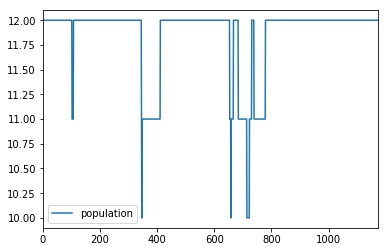

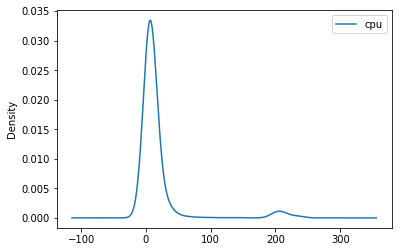

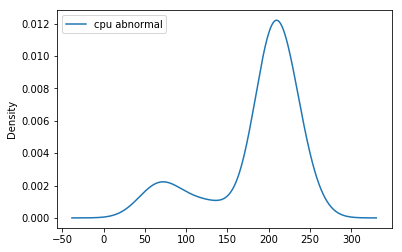

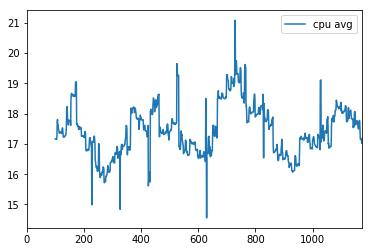

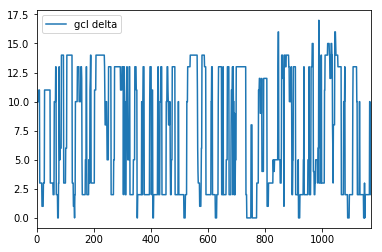

In [2]:
import fetch_stats as fs
import pandas as pd
import matplotlib.pyplot as plt

REFRESH_DATA = 0

if REFRESH_DATA:
    reports = fs.main()
    reports = [
        {
            **x,
            'gcl': x['gcl']['progress']
        }
        for x in reports
    ]
    df = pd.DataFrame(reports)
    df.to_csv("reports.csv")
else:
    df = pd.read_csv("reports.csv")
    
df['gcl delta'] = df['gcl'].diff().shift(-1)
df['cpu abnormal'] = df[df['cpu'] > 50]["cpu"]
df['cpu avg'] = df['cpu'].rolling(100).sum() / 100

df.plot(y="population")
df.plot.density(y="cpu")
df.plot.density(y="cpu abnormal")
df.plot(y="cpu avg")
df.plot(y="gcl delta")
df.describe()